In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
fault=pd.read_csv("C:\\Users\\SHRI\\Downloads\\classData.csv")

In [4]:
fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
fault.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
353,1,0,0,1,-223.980572,-59.399913,47.795789,0.380707,-0.496177,0.115470
4187,0,1,1,1,-229.437297,-623.214096,854.657170,-0.041363,0.012732,0.028631
1508,1,0,1,1,-536.276615,882.536621,36.034034,0.017465,-0.004095,-0.013370
5439,1,1,1,1,716.937676,54.498270,22.738626,0.054155,-0.380266,0.326111
4826,1,1,1,1,-809.625271,98.207678,711.415365,-0.033057,0.039519,-0.006462
5609,0,0,0,0,53.242322,-11.600060,-42.367370,0.306908,0.304921,-0.611828
5432,1,1,1,1,763.566052,-24.863812,22.835704,0.035352,-0.365408,0.330056
6174,0,0,0,0,-48.566537,98.112263,-52.917647,-0.557308,0.059758,0.497551
1044,1,0,0,1,871.851267,46.490428,7.566779,-0.014481,-0.274388,0.288869
1291,1,0,1,1,344.072570,-894.253181,-46.664328,-0.026147,0.102743,-0.076597


In [6]:
fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [7]:
fault['fault_col']=fault["G"].astype(str)+fault["C"].astype(str)+fault["B"].astype(str)+fault["A"].astype(str)

In [15]:
fault.sample(7)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col,diff
5513,0,0,0,0,-59.878453,-16.124195,33.059538,0.436643,-0.497284,0.060641,0000,0
135,1,0,0,1,-5.674204,46.107476,-50.119714,-0.375858,0.573500,-0.197642,1001,0
2398,0,1,1,0,2.280423,-727.903935,728.138047,-0.330832,-0.013461,0.344293,0110,0
4161,0,1,1,1,-549.307507,-323.359832,874.678134,-0.041617,0.027734,0.013883,0111,-1
465,1,0,0,1,-791.736073,-26.692008,-23.145235,-0.110184,0.434583,-0.324399,1001,0
2043,1,0,1,1,-305.170073,-557.872096,-57.341880,-0.042031,0.323179,-0.281148,1011,0
3378,0,1,1,1,-318.780275,-570.423824,891.372039,-0.037383,0.015529,0.021854,0111,-1


In [14]:
fault["fault_col"].value_counts()

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: fault_col, dtype: int64

In [10]:
fault["fault_col"][fault["fault_col"]=="0000"]="No fault" 
fault["fault_col"][fault["fault_col"]=="1011"]="LLG fault" 
fault["fault_col"][fault["fault_col"]=="1111"]="LLLG fault" 
fault["fault_col"][fault["fault_col"]=="0111"]="LLL fault" 
fault["fault_col"][fault["fault_col"]=="0110"]="LL fault" 
fault["fault_col"][fault["fault_col"]=="1001"]="LG fault" 

C:\Users\SHRI\AppData\Local\Temp\ipykernel_8996\1390779324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault["fault_col"][fault["fault_col"]=="0000"]="No fault"
C:\Users\SHRI\AppData\Local\Temp\ipykernel_8996\1390779324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault["fault_col"][fault["fault_col"]=="1011"]="LLG fault"
C:\Users\SHRI\AppData\Local\Temp\ipykernel_8996\1390779324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [11]:
fault["fault_col"]

0       LG fault
1       LG fault
2       LG fault
3       LG fault
4       LG fault
          ...   
7856    No fault
7857    No fault
7858    No fault
7859    No fault
7860    No fault
Name: fault_col, Length: 7861, dtype: object

In [13]:
fault

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG fault
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,No fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,No fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,No fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,No fault


In [14]:
#fault=fault.drop(labels=["G","A","B","C"],axis=1)

In [15]:
fault.isna().sum()

G            0
C            0
B            0
A            0
Ia           0
Ib           0
Ic           0
Va           0
Vb           0
Vc           0
fault_col    0
dtype: int64

In [16]:
fault.dtypes

G              int64
C              int64
B              int64
A              int64
Ia           float64
Ib           float64
Ic           float64
Va           float64
Vb           float64
Vc           float64
fault_col     object
dtype: object

In [17]:
fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G          7861 non-null   int64  
 1   C          7861 non-null   int64  
 2   B          7861 non-null   int64  
 3   A          7861 non-null   int64  
 4   Ia         7861 non-null   float64
 5   Ib         7861 non-null   float64
 6   Ic         7861 non-null   float64
 7   Va         7861 non-null   float64
 8   Vb         7861 non-null   float64
 9   Vc         7861 non-null   float64
 10  fault_col  7861 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 675.7+ KB


In [18]:
fault.duplicated().sum()

0

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fault_col', ylabel='count'>

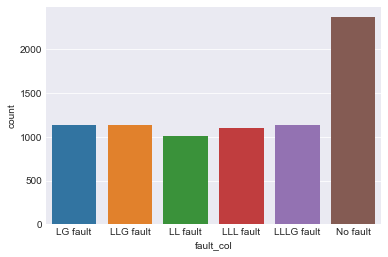

In [19]:
sns.countplot(fault["fault_col"])

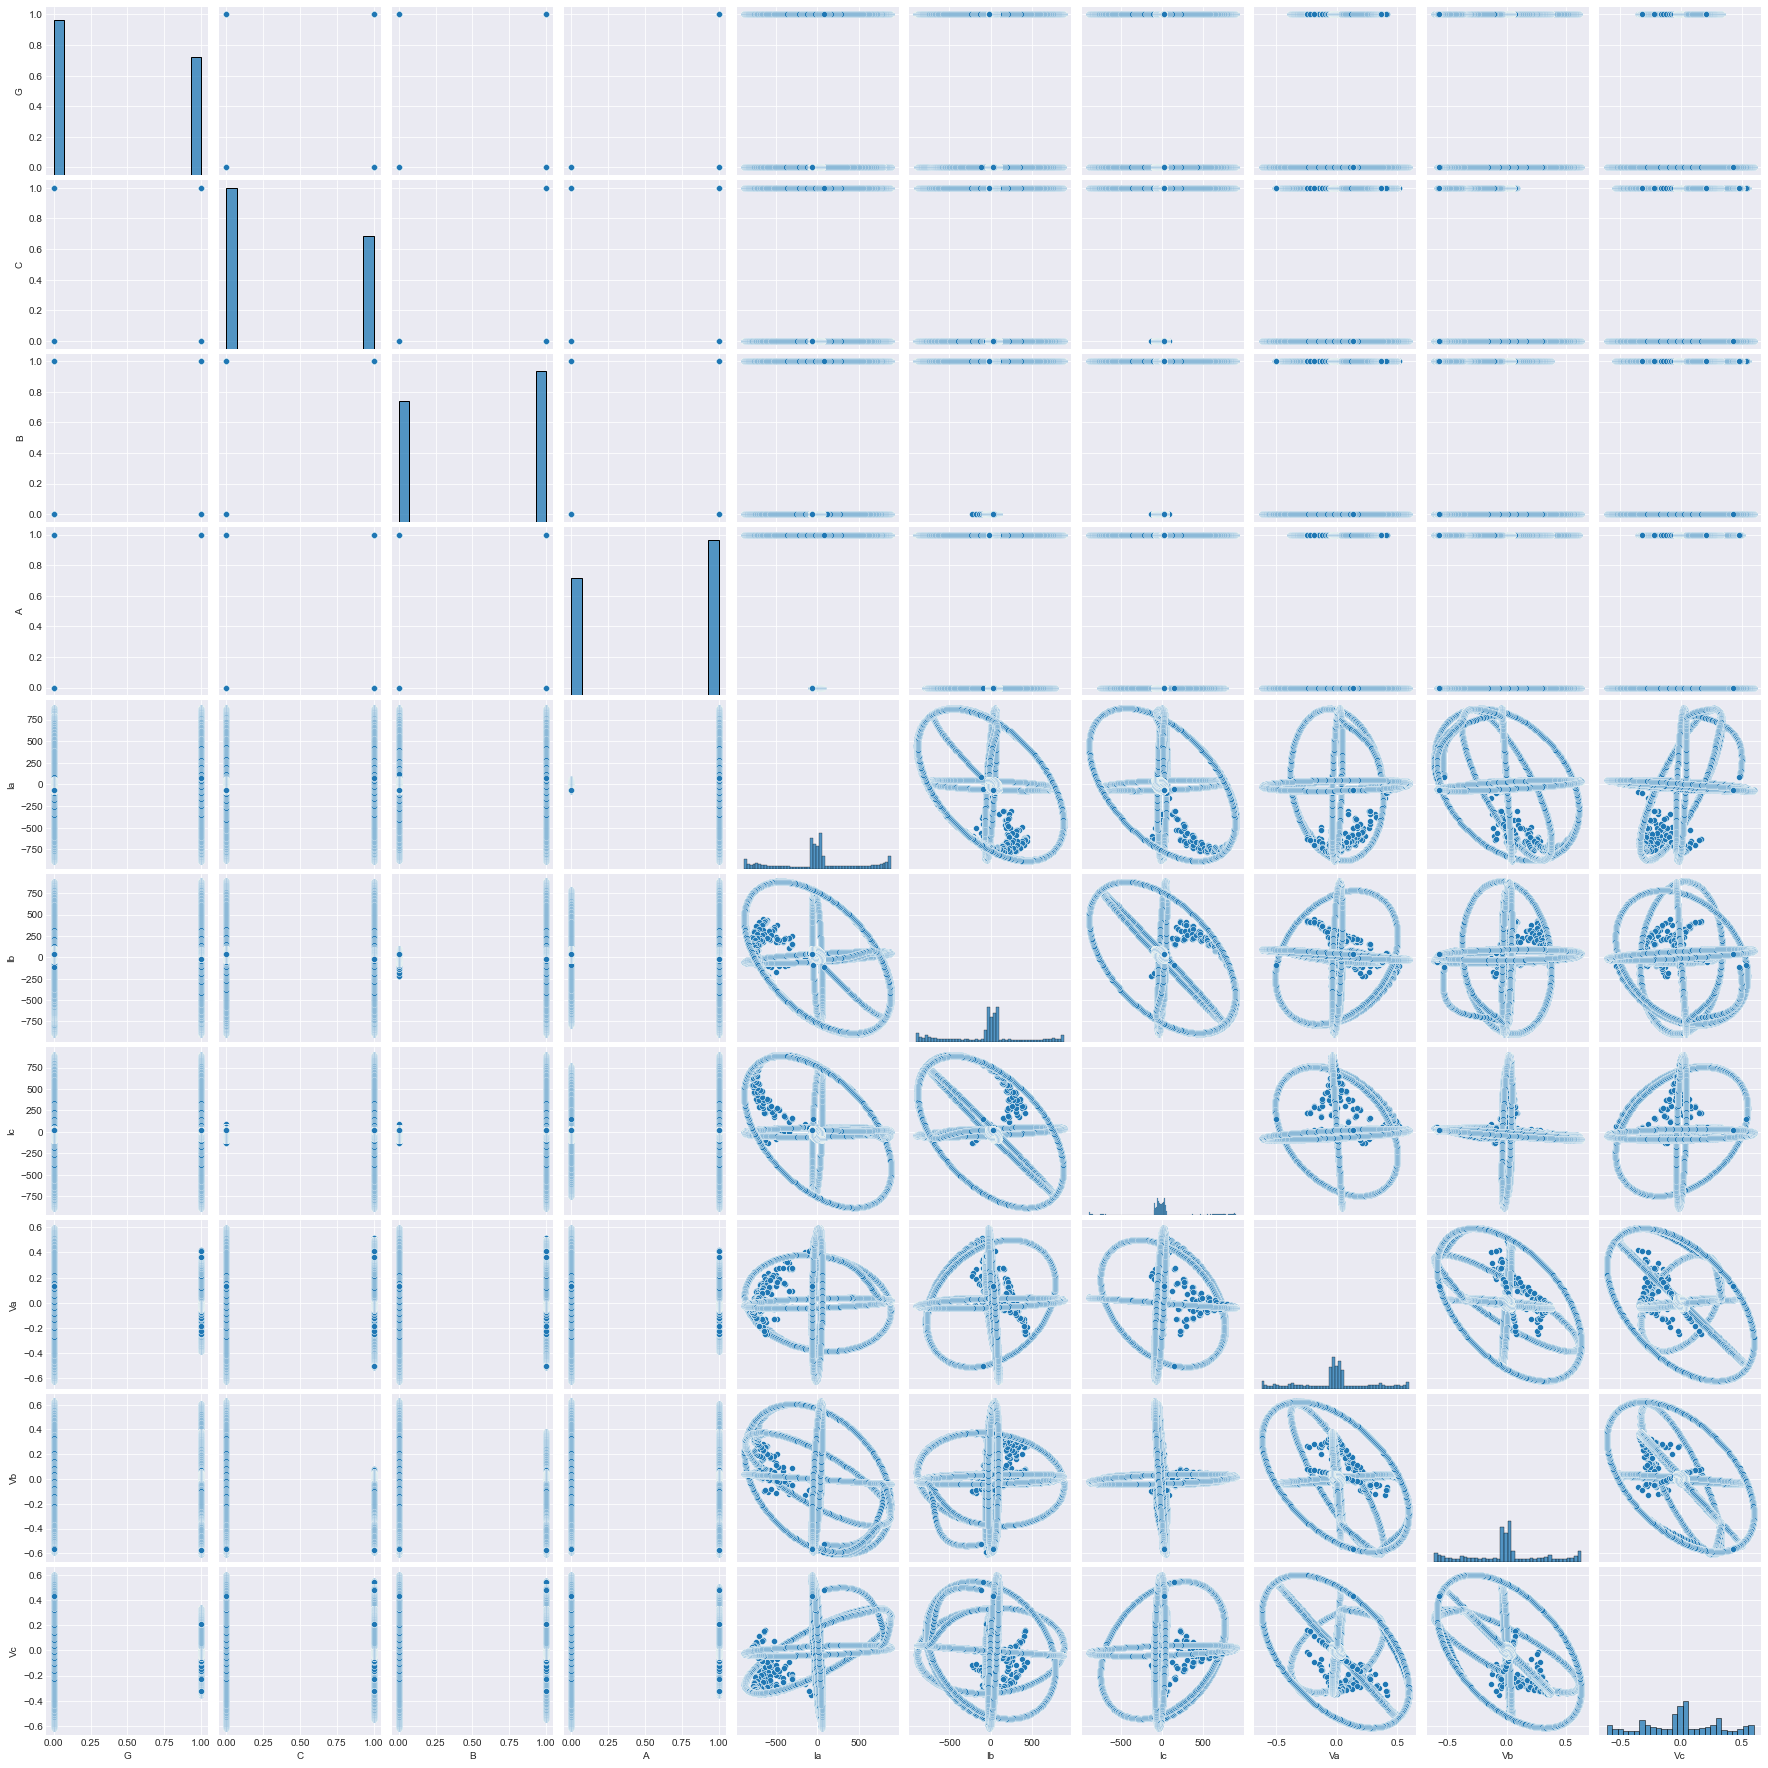

In [20]:
sns.pairplot(fault)

In [21]:
import sweetviz as sv

In [ ]:
sweet_report = sv.analyze(fault)
sweet_report.show_html('weather_report.html')

In [ ]:
!pip install pyqt5



In [ ]:
pip install tk


In [22]:
fault.corr()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000


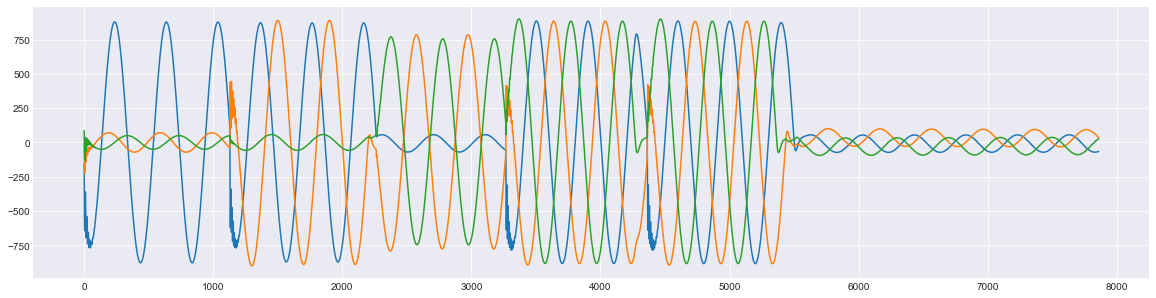

In [23]:

plt.figure(figsize=(20,5))
plt.plot(fault["Ia"])
plt.plot(fault["Ib"])
plt.plot(fault["Ic"])
plt.show()


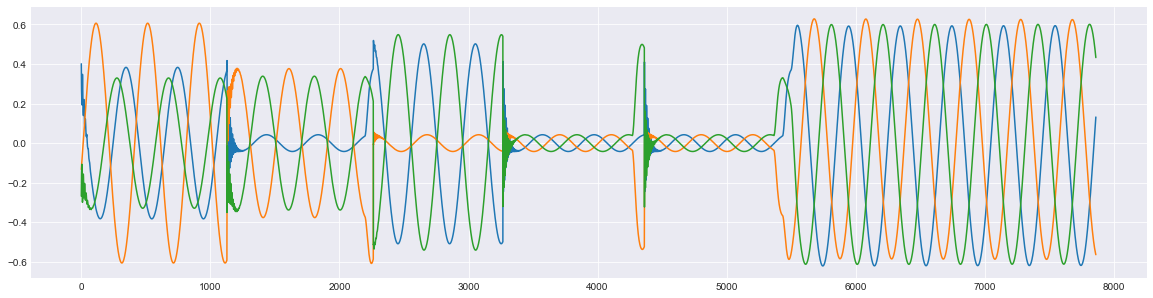

In [24]:
plt.figure(figsize=(20,5))
plt.plot(fault["Va"])
plt.plot(fault["Vb"])
plt.plot(fault["Vc"])

In [25]:
no_fault=fault[fault["fault_col"]=="No fault"]

In [26]:
no_fault

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,No fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,No fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,No fault
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,No fault
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,No fault
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,No fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,No fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,No fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,No fault


Text(0.5, 1.0, '$No$ $fault$ $current$')

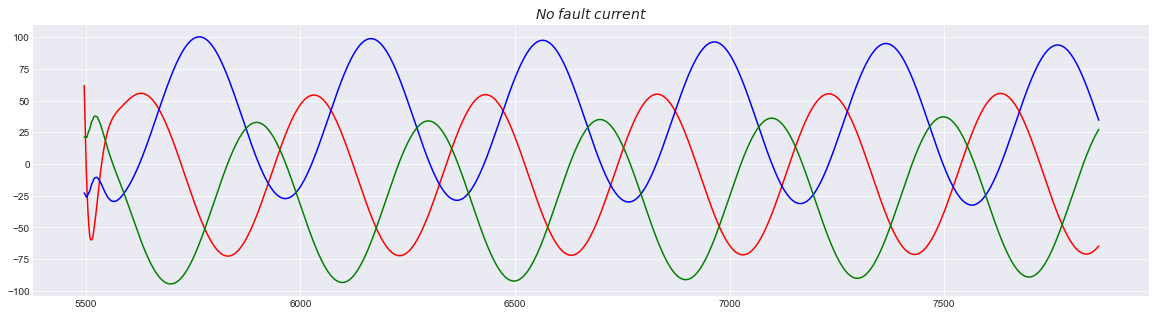

In [27]:
plt.figure(figsize=(20,5))
plt.plot(no_fault["Ia"],"r")
plt.plot(no_fault["Ib"],"b")
plt.plot(no_fault["Ic"],"g")
plt.title("$No$ $fault$ $current$" ,fontsize = 14)


Text(0.5, 1.0, '$No$ $fault$ $voltage$')

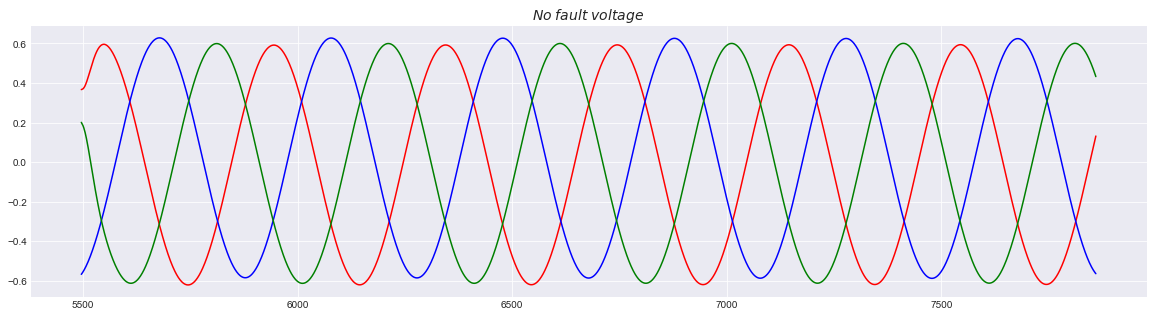

In [28]:
plt.figure(figsize=(20,5))
plt.plot(no_fault["Va"],"r",label="$Va$")
plt.plot(no_fault["Vb"],"b",label="$Vb$")
plt.plot(no_fault["Vc"],"g",label="$Vc$")
plt.title("$No$ $fault$ $voltage$" ,fontsize = 14)


In [29]:
fault_LG=fault[fault["fault_col"]=="LG fault"]

In [30]:
fault_LG

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,LG fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,LG fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,LG fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,LG fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,LG fault
...,...,...,...,...,...,...,...,...,...,...,...
1124,1,0,0,1,172.165177,-36.404259,49.275700,0.359282,-0.598578,0.239296,LG fault
1125,1,0,0,1,158.623300,-37.353382,49.396133,0.361311,-0.597027,0.235717,LG fault
1126,1,0,0,1,145.042284,-38.293288,49.504378,0.363250,-0.595329,0.232079,LG fault
1127,1,0,0,1,131.425478,-39.223746,49.600409,0.365100,-0.593484,0.228385,LG fault


Text(0.5, 1.0, '$LG$ $fault$ $current$')

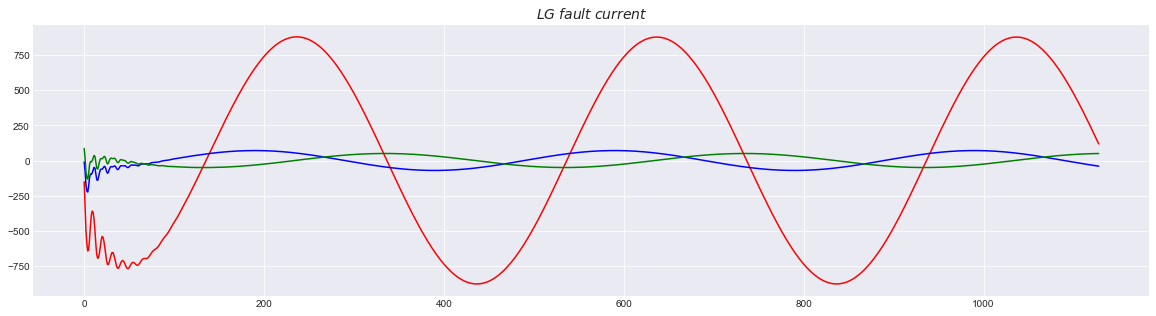

In [31]:
plt.figure(figsize=(20,5))
plt.plot(fault_LG["Ia"],"r")
plt.plot(fault_LG["Ib"],"b")
plt.plot(fault_LG["Ic"],"g")
plt.title("$LG$ $fault$ $current$" ,fontsize = 14)

Text(0.5, 1.0, '$LG$ $fault$ $voltage$')

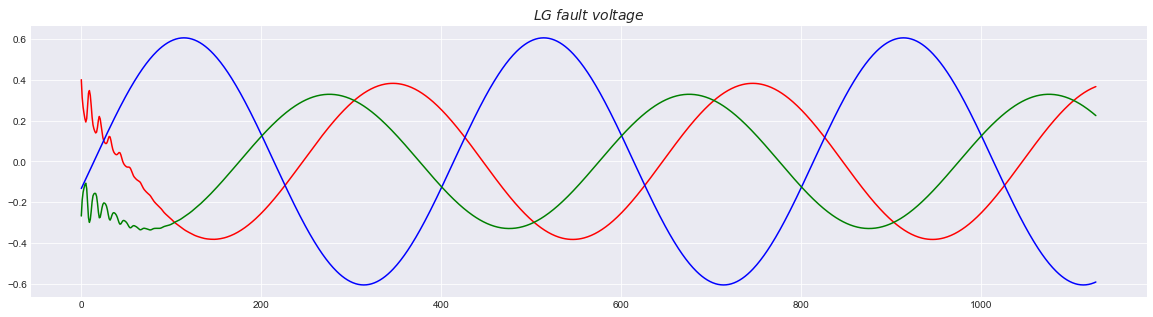

In [32]:
plt.figure(figsize=(20,5))
plt.plot(fault_LG["Va"],"r",label="$Va$")
plt.plot(fault_LG["Vb"],"b",label="$Vb$")
plt.plot(fault_LG["Vc"],"g",label="$Vc$")
plt.title("$LG$ $fault$ $voltage$" ,fontsize = 14)

In [33]:
fault_LLL=fault[fault["fault_col"]=="LLL fault"]

In [34]:
fault_LLL

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,LLL fault
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,LLL fault
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,LLL fault
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,LLL fault
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,LLL fault
...,...,...,...,...,...,...,...,...,...,...,...
4358,0,1,1,1,132.451559,-164.938281,34.621109,0.041156,-0.529412,0.488256,LLL fault
4359,0,1,1,1,120.505396,-153.266820,34.895221,0.041306,-0.528009,0.486703,LLL fault
4360,0,1,1,1,108.525093,-141.561998,35.170087,0.041447,-0.526492,0.485045,LLL fault
4361,0,1,1,1,96.513527,-129.826784,35.445798,0.041577,-0.524859,0.483282,LLL fault


Text(0.5, 1.0, '$LLL$ $fault$ $current$')

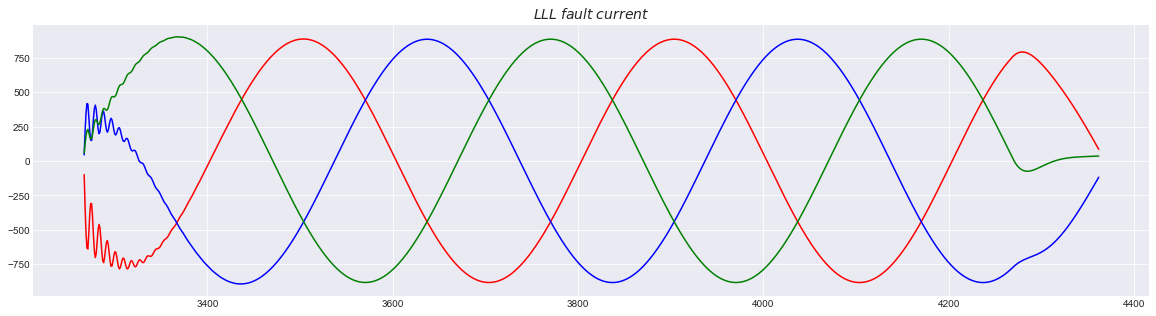

In [35]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLL["Ia"],"r",label="$Ia$")
plt.plot(fault_LLL["Ib"],"b",label="$Ib$")
plt.plot(fault_LLL["Ic"],"g",label="$Ic$")
plt.title("$LLL$ $fault$ $current$" ,fontsize = 14)

Text(0.5, 1.0, '$LLL$ $fault$ $voltage$')

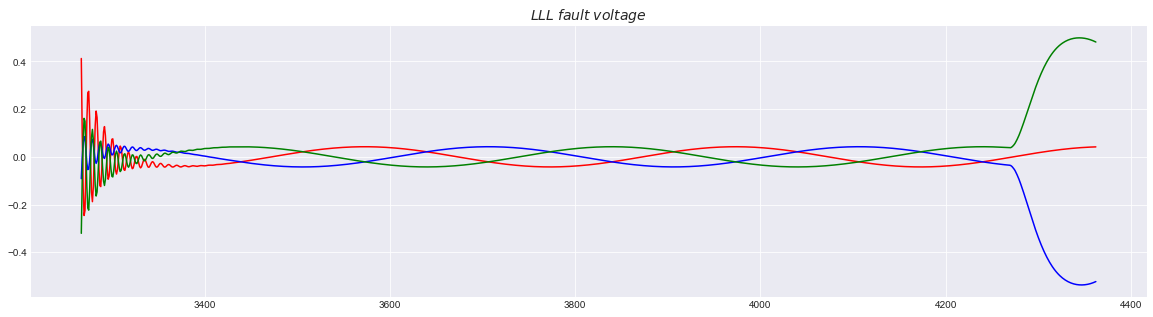

In [36]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLL["Va"],"r",label="$Va$")
plt.plot(fault_LLL["Vb"],"b",label="$Vb$")
plt.plot(fault_LLL["Vc"],"g",label="$Vc$")
plt.title("$LLL$ $fault$ $voltage$" ,fontsize = 14)

In [37]:
fault_LLG=fault[fault["fault_col"]=="LLG fault"]

In [38]:
fault_LLG

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,LLG fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,LLG fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,LLG fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,LLG fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,LLG fault
...,...,...,...,...,...,...,...,...,...,...,...
2258,1,0,1,1,116.234989,-47.298151,50.288237,0.369579,-0.596102,0.226523,LLG fault
2259,1,0,1,1,102.596687,-47.955629,50.583888,0.371027,-0.593813,0.222786,LLG fault
2260,1,0,1,1,88.915836,-48.566831,50.847114,0.372353,-0.591343,0.218991,LLG fault
2261,1,0,1,1,75.196922,-49.130974,51.083340,0.373557,-0.588700,0.215143,LLG fault


Text(0.5, 1.0, '$LLG$ $fault$ $current$')

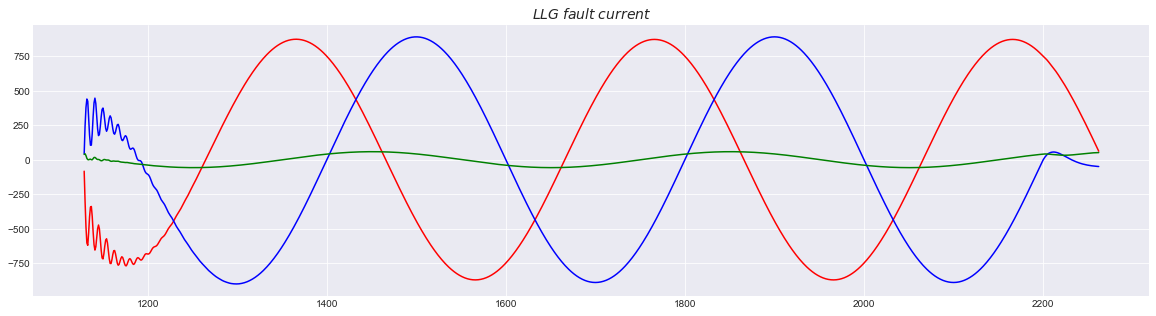

In [39]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLG["Ia"],"r",label="$Ia$")
plt.plot(fault_LLG["Ib"],"b",label="$Ib$")
plt.plot(fault_LLG["Ic"],"g",label="$Ic$")
plt.title("$LLG$ $fault$ $current$" ,fontsize = 14)

Text(0.5, 1.0, '$LLG$ $fault$ $voltage$')

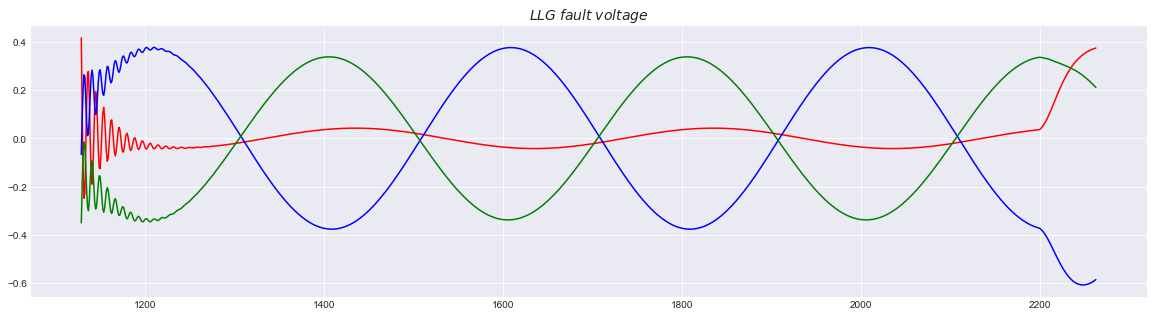

In [40]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLG["Va"],"r",label="$Va$")
plt.plot(fault_LLG["Vb"],"b",label="$Vb$")
plt.plot(fault_LLG["Vc"],"g",label="$Vc$")
plt.title("$LLG$ $fault$ $voltage$" ,fontsize = 14)

In [41]:
fault_LLLG=fault[fault["fault_col"]=="LLLG fault"]

In [42]:
fault_LLLG

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,LLLG fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,LLLG fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,LLLG fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,LLLG fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,LLLG fault
...,...,...,...,...,...,...,...,...,...,...,...
5491,1,1,1,1,130.117188,-19.541395,19.717378,0.359460,-0.579100,0.219640,LLLG fault
5492,1,1,1,1,116.522025,-20.282441,20.083174,0.361053,-0.577090,0.216037,LLLG fault
5493,1,1,1,1,102.899531,-20.981157,20.404671,0.362540,-0.574888,0.212348,LLLG fault
5494,1,1,1,1,89.239696,-21.648872,20.675159,0.363919,-0.572499,0.208581,LLLG fault


Text(0.5, 1.0, '$LLLG$ $fault$ $current$')

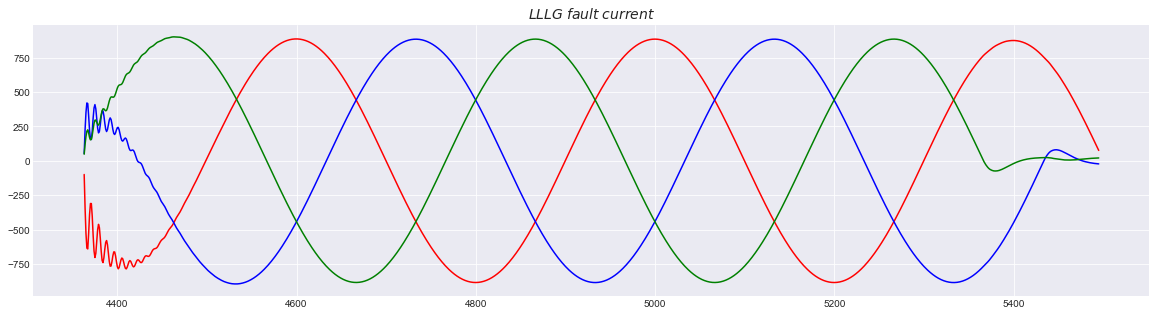

In [43]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLLG["Ia"],"r",label="$Ia$")
plt.plot(fault_LLLG["Ib"],"b",label="$Ib$")
plt.plot(fault_LLLG["Ic"],"g",label="$Ic$")
plt.title("$LLLG$ $fault$ $current$" ,fontsize = 14)

Text(0.5, 1.0, '$LLLG$ $fault$ $voltage$')

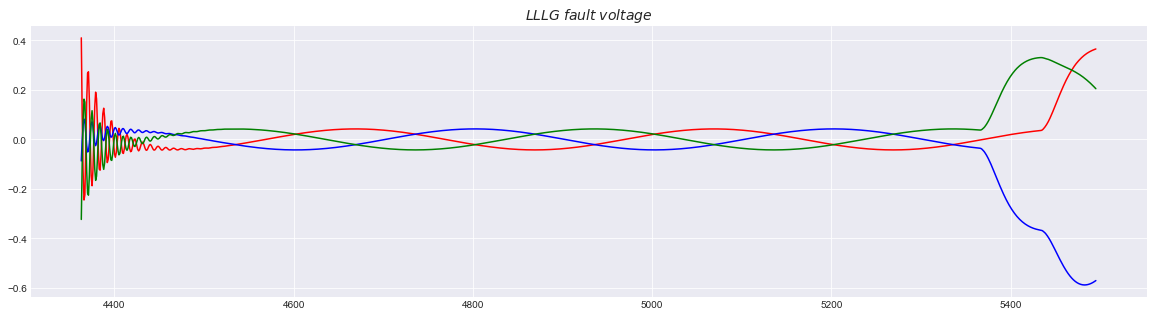

In [44]:
plt.figure(figsize=(20,5))
plt.plot(fault_LLLG["Va"],"r",label="$Va$")
plt.plot(fault_LLLG["Vb"],"b",label="$Vb$")
plt.plot(fault_LLLG["Vc"],"g",label="$Vc$")
plt.title("$LLLG$ $fault$ $voltage$" ,fontsize = 14)

In [45]:
fault_LL=fault[fault["fault_col"]=="LL fault"]

In [46]:
fault_LL

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,LL fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,LL fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,LL fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,LL fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,LL fault
...,...,...,...,...,...,...,...,...,...,...,...
3262,0,1,1,0,-54.290034,-136.096517,192.625747,-0.503500,-0.040943,0.544443,LL fault
3263,0,1,1,0,-54.931249,-124.016643,181.187060,-0.502331,-0.041107,0.543438,LL fault
3264,0,1,1,0,-55.560456,-111.905120,169.704756,-0.501039,-0.041262,0.542301,LL fault
3265,0,1,1,0,-56.177499,-99.764935,158.181668,-0.499625,-0.041406,0.541030,LL fault


Text(0.5, 1.0, '$LL$ $fault$ $current$')

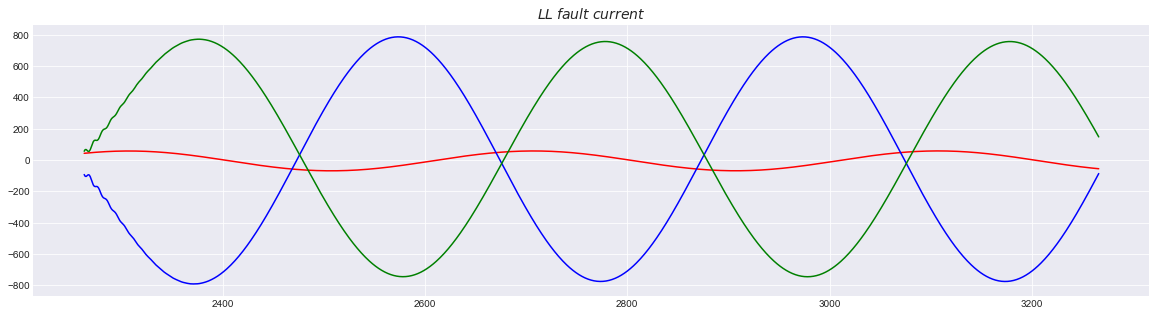

In [47]:
plt.figure(figsize=(20,5))
plt.plot(fault_LL["Ia"],"r",label="$Ia$")
plt.plot(fault_LL["Ib"],"b",label="$Ib$")
plt.plot(fault_LL["Ic"],"g",label="$Ic$")
plt.title("$LL$ $fault$ $current$" ,fontsize = 14)

Text(0.5, 1.0, '$LL$ $fault$ $voltage$')

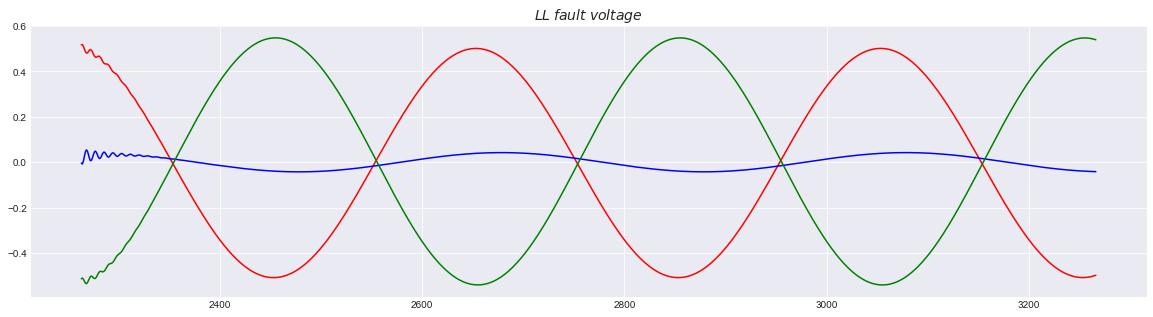

In [48]:
plt.figure(figsize=(20,5))
plt.plot(fault_LL["Va"],"r",label="$Va$")
plt.plot(fault_LL["Vb"],"b",label="$Vb$")
plt.plot(fault_LL["Vc"],"g",label="$Vc$")
plt.title("$LL$ $fault$ $voltage$" ,fontsize = 14)

In [49]:
fault.corr()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
G,1.000000,-0.137611,0.196609,0.755273,0.041310,-0.031068,-0.003156,0.023808,-0.024048,0.002122
C,-0.137611,1.000000,0.747612,0.199335,0.000232,-0.109211,0.164323,0.018188,-0.068840,0.052998
B,0.196609,0.747612,1.000000,0.448807,0.014102,-0.139981,0.133321,0.037128,-0.075973,0.042473
A,0.755273,0.199335,0.448807,1.000000,0.036341,-0.074905,0.054071,0.029940,-0.053036,0.025873
Ia,0.041310,0.000232,0.014102,0.036341,1.000000,-0.374241,-0.276457,0.035682,-0.274612,0.246043
Ib,-0.031068,-0.109211,-0.139981,-0.074905,-0.374241,1.000000,-0.528291,0.029118,0.032101,-0.060023
Ic,-0.003156,0.164323,0.133321,0.054071,-0.276457,-0.528291,1.000000,-0.069137,-0.056967,0.122919
Va,0.023808,0.018188,0.037128,0.029940,0.035682,0.029118,-0.069137,1.000000,-0.480247,-0.450225
Vb,-0.024048,-0.068840,-0.075973,-0.053036,-0.274612,0.032101,-0.056967,-0.480247,1.000000,-0.566986
Vc,0.002122,0.052998,0.042473,0.025873,0.246043,-0.060023,0.122919,-0.450225,-0.566986,1.000000


In [50]:
fault.var()

C:\Users\SHRI\AppData\Local\Temp\ipykernel_8996\523515224.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fault.var()


G          0.245408
C          0.242158
B          0.246948
A          0.244929
Ia    215984.820625
Ib    192957.426104
Ic    137720.711443
Va         0.083608
Vb         0.098243
Vc         0.094801
dtype: float64

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ia', ylabel='Density'>

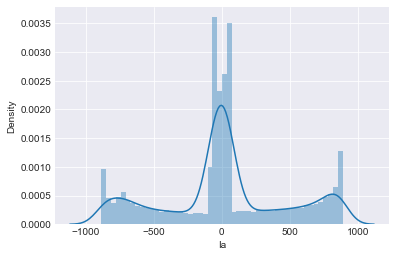

In [51]:
sns.distplot(fault["Ia"])

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ib', ylabel='Density'>

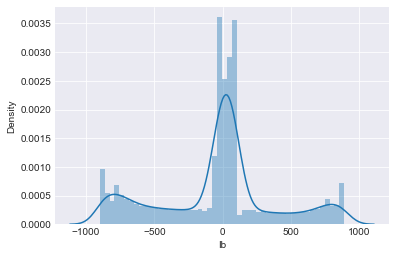

In [52]:
sns.distplot(fault["Ib"])

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ic', ylabel='Density'>

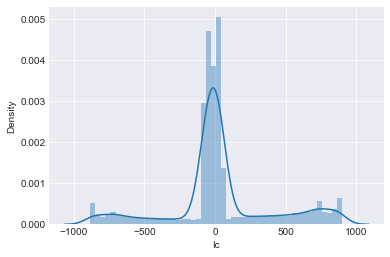

In [53]:
sns.distplot(fault["Ic"])

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Va', ylabel='Density'>

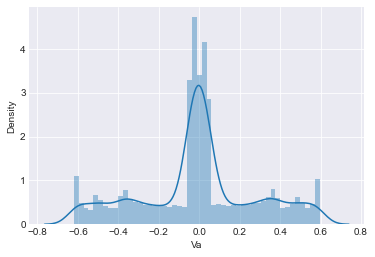

In [54]:
sns.distplot(fault["Va"])

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vb', ylabel='Density'>

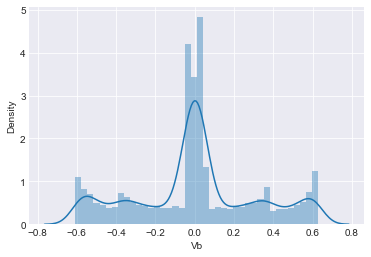

In [55]:
sns.distplot(fault["Vb"])

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vc', ylabel='Density'>

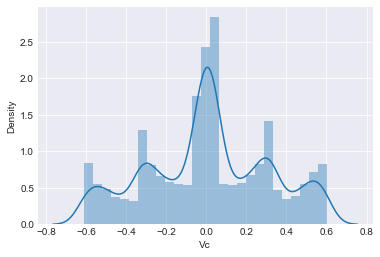

In [56]:
sns.distplot(fault["Vc"])

In [57]:
fault.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [58]:
fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
2855,0,1,1,0,-49.724317,-219.350633,271.409782,-0.508346,-0.039512,0.547858,LL fault
2600,0,1,1,0,-13.784344,718.536638,-702.085770,0.335734,0.014111,-0.349845,LL fault
1900,1,0,1,1,-446.040025,889.868884,41.412081,0.022158,-0.051249,0.029091,LLG fault
6164,0,0,0,0,-40.338150,98.866559,-61.903571,-0.592672,0.153891,0.438781,No fault
4402,1,1,1,1,-774.847713,225.565163,549.818628,-0.053757,0.042321,0.011437,LLLG fault


In [59]:
fault.sample()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
2621,0,1,1,0,6.98772,577.83486,-582.124338,0.438594,0.02629,-0.464884,LL fault


In [60]:
fault.iloc[2749]

G                     0
C                     1
B                     1
A                     0
Ia            43.542844
Ib          -719.092748
Ic           678.099267
Va             0.028843
Vb             0.018882
Vc            -0.047726
fault_col      LL fault
Name: 2749, dtype: object

# Label Encoding

In [62]:
from sklearn import preprocessing

In [63]:
le=preprocessing.LabelEncoder()
le.fit(fault["fault_col"])
fault["fault_col"]=le.transform(fault["fault_col"])


In [64]:
fault.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_col
430,1,0,0,1,-873.160494,-57.015672,3.381593,0.097573,0.149932,-0.247505,0
5936,0,0,0,0,-4.236004,-21.003285,21.790341,0.585639,-0.350564,-0.235075,5
6885,0,0,0,0,33.627847,53.246173,-90.023238,-0.371380,0.621896,-0.250516,5
1345,1,0,1,1,827.481887,-679.212121,-5.325409,0.006843,-0.203451,0.196609,2
161,1,0,0,1,337.312966,63.635273,-45.730856,-0.372391,0.448678,-0.076287,0
4927,1,1,1,1,366.482110,-879.753010,513.268640,-0.026017,-0.015923,0.041941,4
2290,0,1,1,0,54.129063,-313.501103,262.152912,0.428403,0.022360,-0.450763,1
1778,1,0,1,1,855.284477,-299.733024,23.887193,0.026447,-0.333613,0.307166,2
5667,0,0,0,0,44.991726,39.635148,-87.468444,-0.222409,0.618743,-0.396334,5
97,1,0,0,1,-472.090740,7.982497,-41.808614,-0.270883,0.584236,-0.313352,0


In [65]:
fault["fault_col"].unique()

array([0, 2, 1, 3, 4, 5])

In [66]:
fault["fault_col"].value_counts()

5    2365
2    1134
4    1133
0    1129
3    1096
1    1004
Name: fault_col, dtype: int64

In [67]:
fault.shape

(7861, 11)

In [68]:
fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   G          7861 non-null   int64  
 1   C          7861 non-null   int64  
 2   B          7861 non-null   int64  
 3   A          7861 non-null   int64  
 4   Ia         7861 non-null   float64
 5   Ib         7861 non-null   float64
 6   Ic         7861 non-null   float64
 7   Va         7861 non-null   float64
 8   Vb         7861 non-null   float64
 9   Vc         7861 non-null   float64
 10  fault_col  7861 non-null   int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 645.0 KB


# dependent and independent veriable

In [69]:
x=fault.iloc[:,0:10]
y=fault.iloc[:,10]

In [70]:
x

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [71]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7856    5
7857    5
7858    5
7859    5
7860    5
Name: fault_col, Length: 7861, dtype: int32

# train_test_split

In [126]:
from sklearn.model_selection import train_test_split


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [128]:
x_train.shape

(5502, 10)

In [129]:
y_train.shape

(5502,)

In [130]:
x_test.shape

(2359, 10)

In [131]:
y_test.shape

(2359,)

# Logistic regression for classification

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


C:\Users\SHRI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
y_pred.shape

(2359,)

In [135]:
from sklearn.metrics import confusion_matrix


In [136]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [137]:
print(confusion_matrix)

[[326   0   0   0   0   0]
 [  0  65   0 237   0   0]
 [  0   0 346   0   0   0]
 [  0   0   0 298   0   0]
 [  0   0   0   0 349   0]
 [  0   0   0   0   0 738]]


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      0.22      0.35       302
           2       1.00      1.00      1.00       346
           3       0.56      1.00      0.72       298
           4       1.00      1.00      1.00       349
           5       1.00      1.00      1.00       738

    accuracy                           0.90      2359
   macro avg       0.93      0.87      0.84      2359
weighted avg       0.94      0.90      0.88      2359



In [85]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8639253921153031


C:\Users\SHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion matrix')

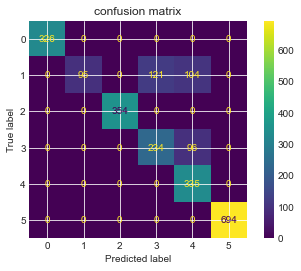

In [117]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg,x_test,y_test)
plt.title("confusion matrix")


In [87]:
logreg.score(x_train,y_train)

0.8774990912395493

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [89]:
roc_auc_score(y_train, logreg.predict_proba(x_train), multi_class='ovr')


0.9981486383312391

# Random forest classifier

In [90]:
x_train

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
6032,0,0,0,0,54.348233,4.994333,-62.760726,0.106094,0.475214,-0.581308
2113,1,0,1,1,588.579507,-871.062112,-32.379843,-0.014388,-0.025452,0.039840
5259,1,1,1,1,-527.987206,-349.766659,877.751602,-0.041854,0.026729,0.015125
4030,0,1,1,1,-353.061735,878.594800,-523.496795,0.026492,0.015379,-0.041871
3365,0,1,1,1,-471.027851,-427.085714,900.284215,-0.042290,0.023832,0.018458
...,...,...,...,...,...,...,...,...,...,...
3363,0,1,1,1,-487.247353,-407.693130,897.111551,-0.035912,0.023170,0.012742
5717,0,0,0,0,4.752997,83.617896,-91.687658,-0.564147,0.518053,0.046094
481,1,0,0,1,-672.574537,-9.548318,-33.420468,-0.197879,0.525933,-0.328054
59,1,0,0,1,-745.041984,-37.536884,-23.672257,-0.077415,0.392920,-0.315505


In [91]:
from sklearn.ensemble import RandomForestClassifier


In [106]:
random_forest=RandomForestClassifier(n_estimators=100,random_state=7,oob_score=True)

In [107]:
random_forest.fit(x_train,y_train)


RandomForestClassifier(oob_score=True, random_state=7)

In [108]:
y_pred_rf=random_forest.predict(x_test)

In [109]:
y_pred_rf

array([1, 0, 5, ..., 0, 4, 5])

In [110]:
train_accuracy=random_forest.score(x_train,y_train)
print("Train accuracy:",train_accuracy)
model_accuracy=accuracy_score(y_pred_rf,y_test)
print("Model accuracy:",model_accuracy)

Train accuracy: 1.0
Model accuracy: 1.0


In [111]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       320
           2       1.00      1.00      1.00       354
           3       1.00      1.00      1.00       330
           4       1.00      1.00      1.00       335
           5       1.00      1.00      1.00       694

    accuracy                           1.00      2359
   macro avg       1.00      1.00      1.00      2359
weighted avg       1.00      1.00      1.00      2359



In [112]:
(y_test==y_pred).value_counts().sum()

2359

In [113]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
results = cross_val_score(model, x_train,y_train)
print(results.mean())

1.0


In [104]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5
fault_col,,,,,,
0,326,0,0,0,0,0
1,0,95,0,121,104,0
2,0,0,354,0,0,0
3,0,0,0,234,96,0
4,0,0,0,0,335,0
5,0,0,0,0,0,694


In [115]:
pd.crosstab(y_test,y_pred_rf)

col_0,0,1,2,3,4,5
fault_col,,,,,,
0,326,0,0,0,0,0
1,0,320,0,0,0,0
2,0,0,354,0,0,0
3,0,0,0,330,0,0
4,0,0,0,0,335,0
5,0,0,0,0,0,694


In [116]:
random_forest.oob_score_

1.0

C:\Users\SHRI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'confusion matrix')

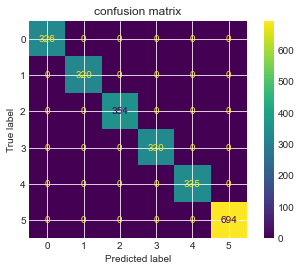

In [119]:
plot_confusion_matrix(random_forest,x_test,y_test)
plt.title("confusion matrix")
